## Introduction
This notebook focuses on solving a real-world problem: predicting housing prices using a comprehensive dataset with 13 key features. Our goal is to apply data analysis and machine learning techniques to forecast prices effectively. We start by understanding the problem and making initial assumptions based on the data. The process includes data cleaning, model creation, training, and testing, followed by validating our assumptions against the results. Through this work, we aim to not only provide accurate predictions but also gain insights into the factors influencing housing prices.

## Import Libraries
In this initial step, we import essential libraries that are foundational for our data analysis and model building. This includes:
- `pandas` for data manipulation and analysis,
- `matplotlib.pyplot` and `seaborn` for data visualization,
- `sklearn`'s `train_test_split`, `StandardScaler`, `LabelEncoder`, and `GradientBoostingRegressor` for preparing our data and constructing the machine learning model,
- `mean_squared_error` and `r2_score` from `sklearn.metrics` to evaluate the performance of our model.

These libraries provide the necessary tools to load the data, preprocess it, visualize patterns, build predictive models, and evaluate their effectiveness.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Load the Data
Here, we load the dataset for our analysis using `pandas`. The dataset, `Housing.csv`, contains various features that could influence housing prices. This step is crucial as it marks the beginning of our journey to explore, understand, and eventually predict housing prices based on the dataset provided.

In [2]:
data = pd.read_csv('Housing.csv')

## Previewing the Dataset
Below is a glimpse of the first 10 rows of our dataset, showcasing a variety of features such as area, number of bedrooms, bathrooms, presence of amenities like air conditioning, and more. This initial peek helps us understand the structure and types of data we will be working with.

In [3]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


## Dataset Information
We have 545 entries each with 13 columns. The dataset comprises both numerical and categorical variables, such as `price`, `area`, and `furnishingstatus`, among others. This summary provides an overview of the data types and non-null counts, crucial for planning our preprocessing steps.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Checking for Missing Values
The analysis confirms that there are no missing values in our dataset. This is an essential step to ensure the integrity of our data before proceeding further with our analysis and model building.

In [6]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Checking for Duplicates
Our dataset has no duplicate entries. Ensuring the uniqueness of each data point is vital for maintaining the accuracy of our analysis and preventing any bias in our model's training and predictions.

In [7]:
data.duplicated().sum()

0

## Identifying Numeric and Categorical Columns
To effectively preprocess our data, we first segregate numeric and categorical columns. This distinction allows us to apply appropriate preprocessing techniques tailored to the nature of each feature type, enhancing our model's performance.

In [8]:
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
cat_cols = data.select_dtypes(exclude=['number']).columns.tolist()
print(numeric_cols)
print(cat_cols)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


## Preparing Features
We remove the `price` column from our list of numeric features as it will serve as our target variable for model predictions. This step ensures that our features are exclusively composed of variables influencing the price.

In [9]:
numeric_cols.remove('price')

## Encoding Categorical Variables
To convert categorical variables into a machine-readable format, we apply `LabelEncoder`. This transformation is crucial for including categorical data in our machine learning model, as it only accepts numerical input.

In [10]:
label_encoder = LabelEncoder()
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [11]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


## Correcting `furnishingstatus` Representation
After applying `LabelEncoder`, the categories in `furnishingstatus` were encoded as numbers (`furnished` to `0` and `unfurnished` to `2`). We reverse these encodings to align better with our model's learning, aiming to improve interpretability and possibly the model's performance by adjusting the numerical representation to reflect the furnished status more intuitively.

In [12]:
data['furnishingstatus'] = data['furnishingstatus'].replace({2: 0, 0: 2})

## Preparing Data for Modeling
We segregate our dataset into features (`X`) and the target variable (`y`), where `X` includes all columns except `price`, and `y` is the `price` column. This separation is crucial for training our model.

In [13]:
X = data.drop('price', axis=1)
y = data['price']

## Splitting the Dataset
The dataset is split into training and testing sets, with 20% of the data reserved for testing. This split helps in evaluating the model's performance on unseen data.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling
We apply `StandardScaler` to normalize the numeric columns in both training and testing sets. Scaling helps in speeding up the convergence of gradient-based optimization algorithms used in training the model.

In [15]:
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

## Creating the Training Dataset
The scaled training features are then combined with the target variable to form a complete training dataset. This consolidated dataset facilitates easier analysis and model training.

In [16]:
train_data = X_train.join(y_train)

## Exploratory Data Analysis: Distribution of Features
Here we visualize the distribution of the features in our training data. These histograms provide insight into the range and frequency of the values across different features. Such visualizations are instrumental in understanding the skewness and outliers in our data, which can be critical for model performance. Notably, features like `area` and `price` show a right-skewed distribution, indicating that most of the properties are concentrated in the lower range with fewer properties at the higher price and area spectrum.

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>],
       [<Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>,
        <Axes: title={'center': 'furnishingstatus'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

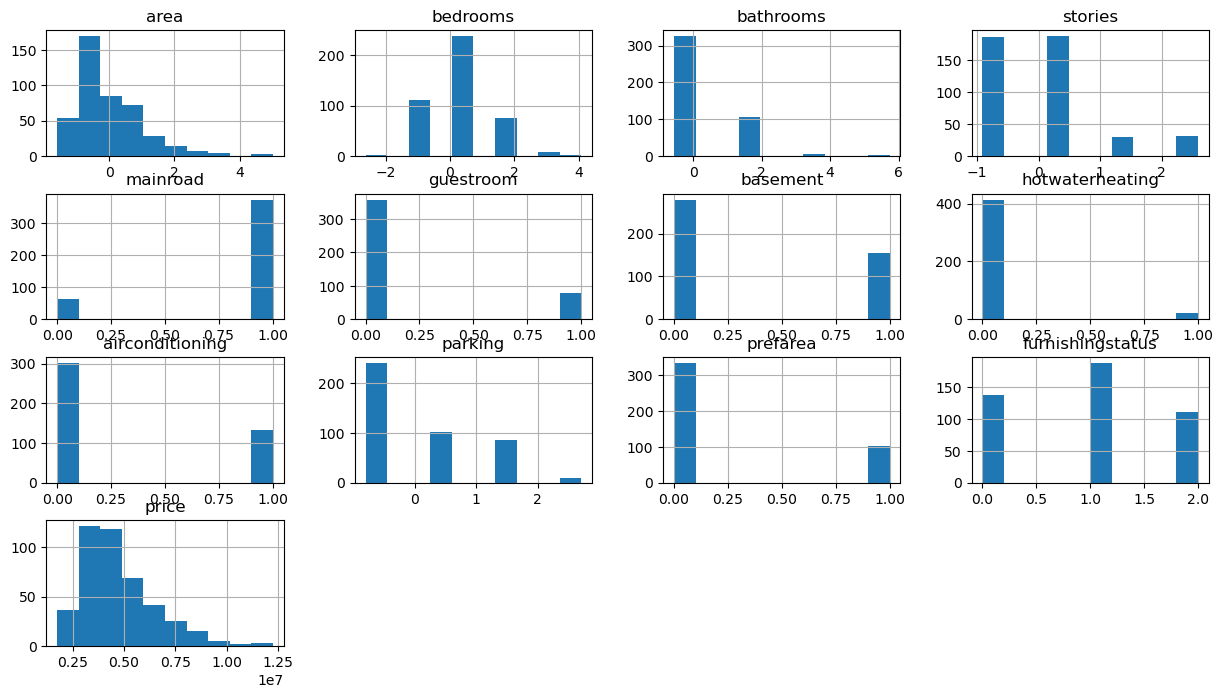

In [17]:
train_data.hist(figsize=(15, 8))

## Correlation Heatmap
The heatmap below represents the correlation matrix for our training dataset. This visual tool helps us to understand the relationships between different features. A high positive value indicates a strong positive correlation, whereas a high negative value suggests a strong negative correlation. For instance, we can observe a notable positive correlation between `bathrooms` and `price`, suggesting that as the number of bathrooms increases, the price tends to increase as well. This correlation matrix is pivotal in feature selection for predictive modeling.

<Axes: >

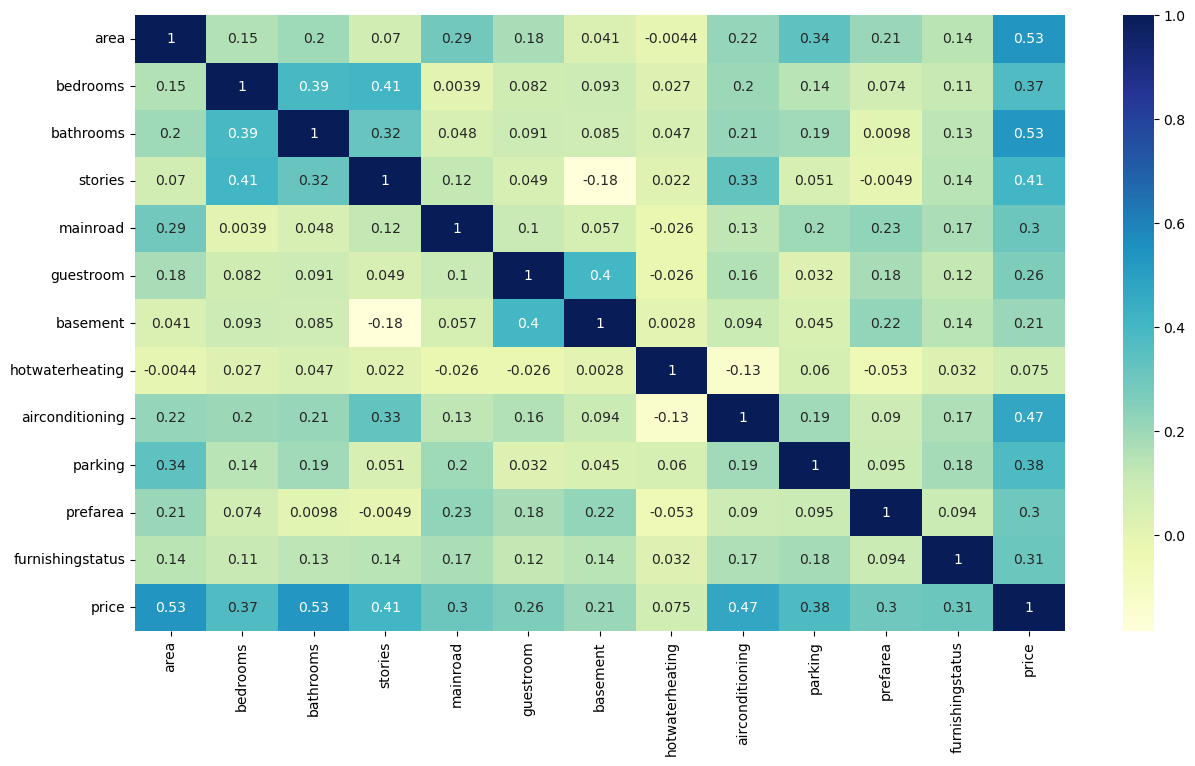

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

## Model Training
We are training a `GradientBoostingRegressor` model with the following hyperparameters: 100 trees (`n_estimators`), a learning rate of 0.1, and a maximum depth of 3 for each tree. The `random_state` set to 42 ensures reproducibility of our results. Gradient boosting is a powerful technique that builds on weak learners in an iterative fashion to improve model predictions. The fitting process here involves adjusting the model weights on the training data to minimize prediction errors.

In [19]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

## Model Performance Metrics
We evaluate the performance of our Gradient Boosting Regressor using the test dataset. The Mean Squared Error (MSE) and R-squared (R^2) are key metrics for this purpose:
- **MSE (Mean Squared Error)**: Represents the average of the squares of the errors, measuring the variance of the prediction errors. Our model achieves an MSE of 1,692,330,750,383.419, which provides an indication of the prediction error magnitude.
- **R^2 (Coefficient of Determination)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. With an R^2 of 0.665, our model explains approximately 66.5% of the variance in housing prices.

These metrics help us understand the model's accuracy and its ability to generalize to new data.

In [20]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 1692330750383.419
R^2: 0.6651880045386205


## Actual vs Predicted Prices
The scatter plot belove illustrates the relationship between the actual and predicted housing prices by our model. The dashed line represents the perfect prediction where the predicted prices exactly match the actual prices. The closer the data points are to this line, the more accurate the predictions. The spread of the points suggests variability in the performance of the model, with some predictions being more accurate than others. This visual assessment helps in understanding the efficacy of the model and areas where it could be improved.

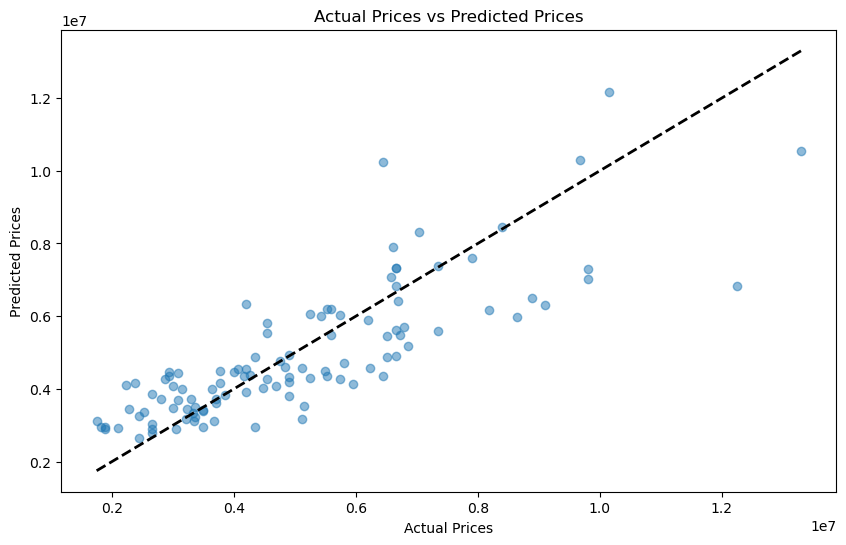

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Conclusions

In our exploration to predict housing prices, we performed comprehensive data preprocessing, including encoding categorical variables and scaling numerical features. We trained a Gradient Boosting Regressor, which demonstrated the ability to explain approximately 66.5% of the variance in housing prices as indicated by the R-squared value.

The Mean Squared Error highlighted the average error in our predictions. The comparison between actual and predicted prices showed a reasonable fit, with room for improvement in prediction accuracy. This suggests that while the model has learned significant patterns from the data, additional features or tuning might enhance its performance.

Future work could explore more sophisticated models, feature engineering, or hyperparameter optimization to improve the model's predictive power.